<b> Before applying any statistical model on a time series, we want to ensure it’s stationary. </b>

![0*1pzh89tPFyvSsarw.png](attachment:0*1pzh89tPFyvSsarw.png)

<b> If a time series is stationary and has a particular behaviour over a given time interval, then it is safe to assume that it will have same behaviour at some later point in time. Most statistical modelling methods assume or require the time series to be stationary. </b>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


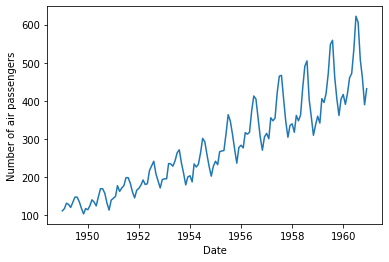

In [ ]:
df = pd.read_csv('air_passangers.csv', parse_dates = ['Month'], index_col = ['Month'])

print(df.head())

plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(df)

<b> As mentioned previously, before we can build a model, we must ensure that the time series is stationary. There are two primary way to determine whether a given time series is stationary. </b>

<b> Rolling Statistics: </b> Plot the rolling mean and rolling standard deviation. The time series is stationary if they remain constant with time (with the naked eye look to see if the lines are straight and parallel to the x-axis).<br>
<b> Augmented Dickey-Fuller Test: </b> The time series is considered stationary if the p-value is low (according to the null hypothesis) and the critical values at 1%, 5%, 10% confidence intervals are as close as possible to the ADF Statistics

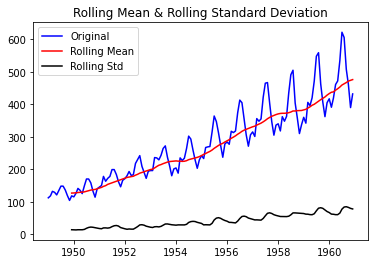

In [ ]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()

plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

<b> As you can see, the rolling mean and rolling standard deviation increase with time. Therefore, we can conclude that the time series is not stationary. </b>

In [ ]:
result = adfuller(df['Passengers'])

print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 0.815368879206047
p-value: 0.991880243437641
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


<b> The ADF Statistic is far from the critical values and the p-value is greater than the threshold (0.05). Thus, we can conclude that the time series is not stationary. </b>

In [ ]:
#Just creating function for it


def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['Passengers'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

<b> There are multiple transformations that we can apply to a time series to render it stationary. For instance, we subtract the rolling mean. </b>

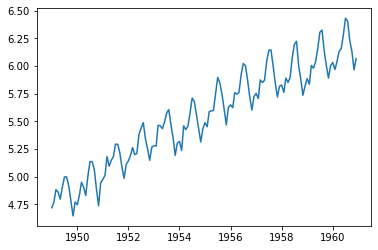

In [ ]:
#Take log as transformation
df_log = np.log(df)
plt.plot(df_log)

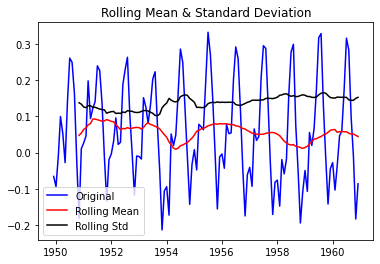

ADF Statistic: -3.162907991300857
p-value: 0.022234630001243903
Critical Values:
	1%: -3.4865346059036564
	5%: -2.8861509858476264
	10%: -2.579896092790057


In [ ]:
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)

get_stationarity(df_log_minus_mean)

<b> AutoRegressive Model (AR) </b>

<u> Autoregressive models operate under the premise that past values have an effect on current values. AR models are commonly used in analyzing nature, economics, and other time-varying processes. As long as the assumption holds, we can build a linear regression model that attempts to predict value of a dependent variable today, given the values it had on previous days. </u>

# AutoRegressive Integrated Moving Average Model (ARIMA)

<b> Three integers (p, d, q) are typically used to parametrize ARIMA models. <br>

p: number of autoregressive terms (AR order) <br>
d: number of nonseasonal differences (differencing order) <br>
q: number of moving-average terms (MA order) <br></b>

<b> Auto Correlation Function (ACF) </b>
The correlation between the observations at the current point in time and the observations at all previous points in time. We can use ACF to determine the optimal number of MA terms. The number of terms determines the order of the model.<br><br>
    
<b> Partial Auto Correlation Function (PACF)</b>
As the name implies, PACF is a subset of ACF. PACF expresses the correlation between observations made at two points in time while accounting for any influence from other data points. We can use PACF to determine the optimal number of terms to use in the AR model. The number of terms determines the order of the model.
Let’s take a look at an example. Recall, that PACF can be used to figure out the best order of the AR model. The horizontal blue dashed lines represent the significance thresholds. The vertical lines represent the ACF and PACF values at in point in time. Only the vertical lines that exceed the horizontal lines are considered significant.

![1*_XkYr07wDWox30jffL5h0w.png](attachment:1*_XkYr07wDWox30jffL5h0w.png)

<b> Thus, we’d use the preceding two days in the autoregression equation.<br>
Recall, that ACF can be used to figure out the best order of the MA model.</b>

[link text](https://)![2*y7jU7murVQQr78lFUPbXrw.png](attachment:2*y7jU7murVQQr78lFUPbXrw.png)

<b> Thus, we’d use the preceding two days in the autoregression equation.
Recall, that ACF can be used to figure out the best order of the MA model. </b>

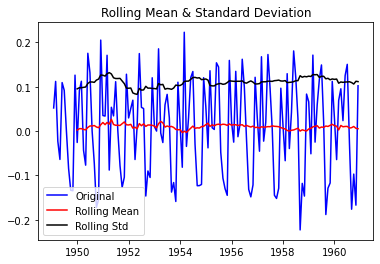

ADF Statistic: -2.7171305983881284
p-value: 0.0711205481508595
Critical Values:
	1%: -3.4825006939887997
	5%: -2.884397984161377
	10%: -2.578960197753906


In [ ]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

/Users/punitshah/opt/anaconda3/envs/greyatom/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/punitshah/opt/anaconda3/envs/greyatom/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No fre

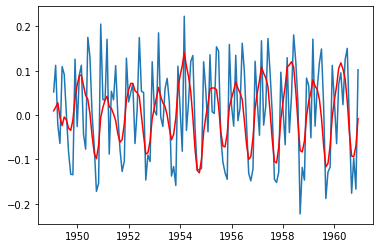

In [ ]:
decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

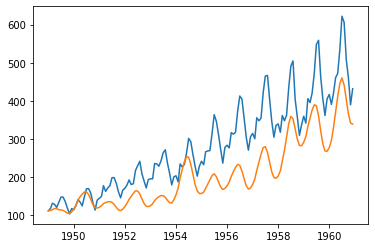

In [ ]:
#Lets make Prediction

predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['Passengers'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)

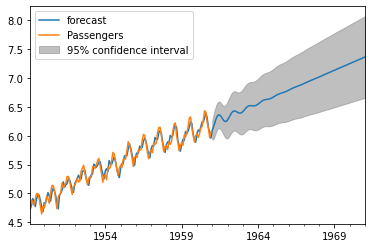

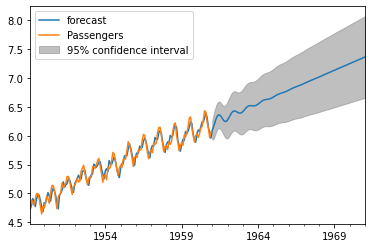

In [ ]:
results.plot_predict(1,264)